# Meteorite Landings

Introduction:
Meteorites are fascinating objects that have captivated the imaginations of people for centuries. These extraterrestrial objects provide a wealth of information about the origins and evolution of our solar system.
Our objective is to analyze various parameters associated with meteorite landings. We will be displaying various findings of our data graphically through this document.

About Dataset :
The meteorite landings dataset maintained by NASA is a comprehensive collection of data on meteorites that have been found on Earth. The dataset contains information on the name, ID, geolocation, latitude, longitude, class, mass, fell/found, name type, and year of each meteorite. This dataset has been widely used in research and provides valuable information for understanding the composition and origins of meteorites.There is date/time vairable as required. Multiple categorical vaiables and numerical values are also present.The dataset has 10 columns and 45715 rows.

Reading Dataset :
The name of our dataset is 'Meteorite_Landings.csv' and we have utilized various libraries by importing them. We have used: pandas, numpy, matplotlib, seaborn and contextily.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Dataset At A Glance

In [2]:
data = pd.read_csv("Meteorite_Landings.csv")
df = data
df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[45716 rows x 10 columns]

# Insights about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
# No of Rows,Columns in dataframe
data.shape

(45716, 10)

# Handling Missing Values

In [5]:
#columns with missing values
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [6]:
#missing value %
data.isnull().sum().sum()/data.size * 100

4.89259777758334

In [7]:
#Focusing individual columns
meteor = data['mass (g)'].value_counts(dropna=False)
meteor

1.30       171
1.20       140
1.40       138
NaN        131
2.10       130
          ... 
38.32        1
32.34        1
26.01        1
385.28       1
2167.00      1
Name: mass (g), Length: 12577, dtype: int64

In [8]:
# 'mass(g)' in some cases in NaN
# Replacing NaN with median of column
data['mass (g)'].fillna(data['mass (g)'].median(), inplace=True)

# verifying values to check if NaNs are replaced by median value
data['mass (g)'].unique()

array([2.100e+01, 7.200e+02, 1.070e+05, ..., 9.000e+05, 1.475e+03,
       2.167e+03])

In [9]:
# year column
meteor_year = data['year'].value_counts(dropna=False)
meteor_year

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1741.0       1
1519.0       1
1671.0       1
1779.0       1
1792.0       1
Name: year, Length: 266, dtype: int64

In [10]:
# Find the mode of the 'year' column
year_mode = data['year'].mode()[0]

# Replace missing values in 'year' column with mode
data['year'].fillna(year_mode, inplace=True)

# verifying values to check if they are replaced by median value
data['year'].unique()

array([1880., 1951., 1952., 1976., 1902., 1919., 1949., 1814., 1930.,
       1920., 1974., 1925., 1769., 1838., 1959., 1981., 1957., 2001.,
       1806., 1766., 2002., 1835., 1873., 1860., 1900., 1883., 1899.,
       1969., 2008., 1977., 1895., 1898., 1939., 2003., 1822., 1869.,
       1942., 1971., 1984., 1914., 1803., 1954., 1932., 1950., 1805.,
       2009., 1923., 1886., 1896., 1933., 1945., 1836., 1865., 1842.,
       1858., 1908., 1855., 1968., 1938., 1934., 1929., 1922., 1907.,
       1993., 1871., 1892., 1913., 1790., 1704., 1904., 1910., 1965.,
       2006., 1994., 2012., 1989., 1916., 1893., 1961., 1937., 1798.,
       2004., 1943., 1924., 1811., 1859., 1921., 1877., 1940., 1905.,
       1827., 1887., 1999., 1843., 1796., 1941., 1906., 1909., 1833.,
       1804., 1962., 1808., 1894., 1852., 1812., 1823., 2011., 1847.,
       1956., 1960., 1964., 2007., 1990., 1946., 1863., 1861., 1870.,
       1991., 1866., 1973., 1846., 1874., 1791., 1848., 1583., 1810.,
       1988., 1840.,

In [11]:
# reclat and reclong column updates
meteor_latitude = data['reclat'].value_counts(dropna=False)
meteor_longitude = data['reclong'].value_counts(dropna=False)
print(meteor_latitude)
print(meteor_longitude)

 NaN         7315
 0.00000     6438
-71.50000    4761
-84.00000    3040
-72.00000    1506
             ... 
 19.20500       1
 19.09667       1
 19.30667       1
 18.62500       1
 49.78917       1
Name: reclat, Length: 12739, dtype: int64
 NaN          7315
 0.00000      6214
 35.66667     4985
 168.00000    3040
 26.00000     1506
              ... 
 157.19583       1
 157.26805       1
 157.22417       1
 157.22861       1
-115.68333       1
Name: reclong, Length: 14641, dtype: int64


In [12]:
# Replace missing values in 'rectlat' and 'reclong' columns with median
data['reclat'].fillna(data['reclat'].median(), inplace=True)
data['reclong'].fillna(data['reclong'].median(), inplace=True)

# Verify that missing values have been replaced with median
print("Latitude - ", data['reclat'].unique())
print("Longitude - ", data['reclong'].unique())

Latitude -  [50.775   56.18333 54.21667 ... 31.2     29.037   49.78917]
Longitude -  [   6.08333   10.23333 -113.      ...    8.96667   41.5046  -115.68333]


In [13]:
#Final Validation of missing values
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)          0
fall              0
year              0
reclat            0
reclong           0
GeoLocation    7315
dtype: int64

# Number of Meteorites that fell in the 20th and 21st century

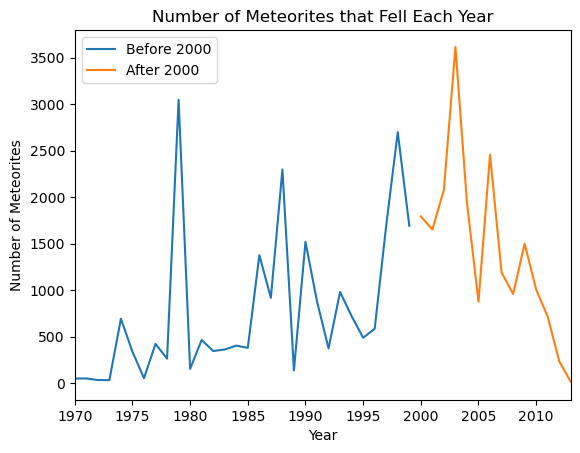

In [14]:
data_before_2000 = data[data['year'] < 2000]
data_after_2000 = data[data['year'] >= 2000]
# Grouping the data by year and count the number of meteorites that fell before and after the 21st century.
counts_before_2000 = data_before_2000.groupby('year')['fall'].count()
counts_after_2000 = data_after_2000.groupby('year')['fall'].count()

# Plot for the line charts for each subset of data
plt.plot(counts_before_2000.index, counts_before_2000.values, label='Before 2000')
plt.plot(counts_after_2000.index, counts_after_2000.values, label='After 2000')
plt.xlabel('Year')
plt.xlim(1970,2013)
plt.ylabel('Number of Meteorites')
plt.title('Number of Meteorites that Fell Each Year')
plt.legend()
plt.show()

As per above line chart highest no. of meteorite observed  was 3323 in year 2003.No. of meteorite observed ranges very low from 1970-1977 but drastic increase can be seen towards year 1980. After 1985, the number of meteorites observed fluctuated, but there was an overall increase from 1985 to 2010. So we can conclude that there will more number of meteorites found in the near future.

# Total Number of Meteorites found before and after the 21st century

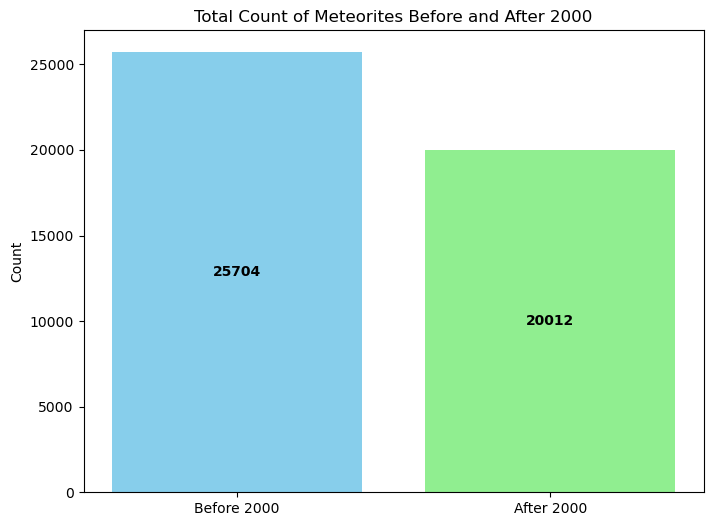

In [15]:
# Create two dataframes for records before 2000 and after 2000
df_before_2000 = data[data['year'] < 2000]
df_after_2000 = data[data['year'] >= 2000]
# Get the count of meteorites before and after 2000
count_before_2000 = len(df_before_2000)
count_after_2000 = len(df_after_2000)

# Create a bar chart showing the total count of meteorites before and after 2000
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Before 2000', 'After 2000'], [count_before_2000, count_after_2000], color=['skyblue', 'lightgreen'])
ax.set_title('Total Count of Meteorites Before and After 2000')
ax.set_ylabel('Count')

# Display count values inside each bar
for i, v in enumerate([count_before_2000, count_after_2000]):
    ax.text(i, v/2, str(v), color='black', fontweight='bold', ha='center', va='center')
plt.show()


As per above Bar chart No. of meteorite observed before 2000  are 25704 which is 23% more than meteorite observed after 2000. Therefore, the average number of meteorites observed per year is higher for the after 2000 data (1972.1) than the before 2000 data (856.8). So we can conclude that there will more number of meteorites found in the near future.

# Most prevalent classes of Meteorites before and after the 21st century

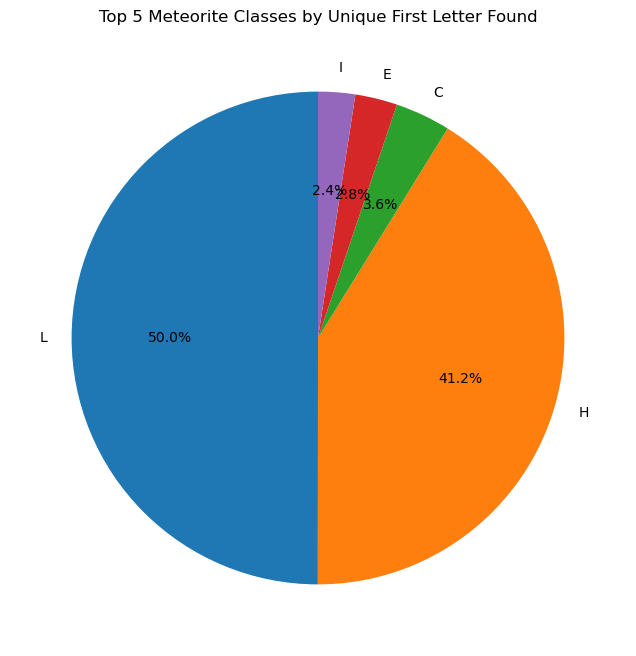

In [16]:
# Group the data by meteorite class and extract the first letter of each class name
class_first_letter = data.groupby('recclass')['recclass'].apply(lambda x: x.str[0])

# Count the number of occurrences of each unique first letter for all classes
class_first_letter_counts = class_first_letter.value_counts()

# Select the top 5 classes by unique first letter count
top_classes = class_first_letter_counts.head(5)

# Create a pie chart for the top 5 classes by unique first letter count
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_classes, labels=top_classes.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Top 5 Meteorite Classes by Unique First Letter Found')
plt.show()


The above pie chart provides the top 5 classes of meteroties found.

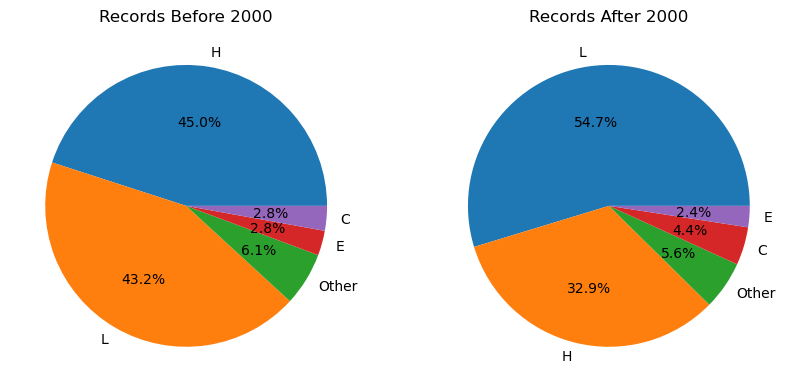

In [17]:
# Create a function to group similar recclass types
def group_recclass(recclass):
    if recclass.startswith('L'):
        return 'L'
    elif recclass.startswith('H'):
        return 'H'
    elif recclass.startswith('C'):
        return 'C'
    elif recclass.startswith('E'):
        return 'E'
    else:
        return 'Other'

# Create a new column 'recclass_group' by applying the group_recclass function to the 'recclass' column
df['recclass_group'] = data['recclass'].apply(group_recclass)

# Create two dataframes for records before 2000 and after 2000
df_before_2000 = df[df['year'] < 2000]
df_after_2000 = df[df['year'] >= 2000]

# Get the value counts of the recclass_group column for both dataframes
counts_before_2000 = df_before_2000['recclass_group'].value_counts()
counts_after_2000 = df_after_2000['recclass_group'].value_counts()

# Create two pie charts, one for before 2000 and one for after 2000
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(counts_before_2000.values, labels=counts_before_2000.index, autopct='%1.1f%%')
ax1.set_title('Records Before 2000')

ax2.pie(counts_after_2000.values, labels=counts_after_2000.index, autopct='%1.1f%%')
ax2.set_title('Records After 2000')

plt.show()


From the above pie chart through out the years observed, more than 80% of meteorite falls were in L and H class.However, the percentage of L class meteorites increased by 11.6%, while the percentage of H class meteorites decreased by 12.1%. This suggests that the composition of meteorites may be changing over time, with a relative increase in L class meteorites and a relative decrease in H class meteorites.

# Frequency distribution of Meteorite masses

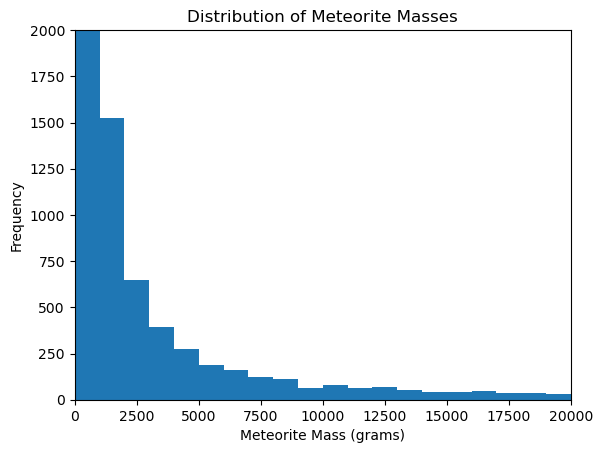

In [18]:

# Plot a histogram of meteorite masses
plt.hist(data['mass (g)'], bins=100, range=(0, 100000))
plt.xlabel('Meteorite Mass (grams)')
plt.ylabel('Frequency')
plt.xlim([0, 20000])
plt.ylim([0, 2000])
plt.title('Distribution of Meteorite Masses')
plt.show()

In the above histogram, most meteorites found are between 0 to 1000 grams range (around 40000).We limited the range to get a better visualization. As the mass increased after 7.5 kgs, the number of meteorites found have exponentially decreased and very heavy meteorites found were rare. We can conclude that more meteorites found are in mass range provided above.

# Box plots of Total Mass of top meteorite class by first letter against mean mass

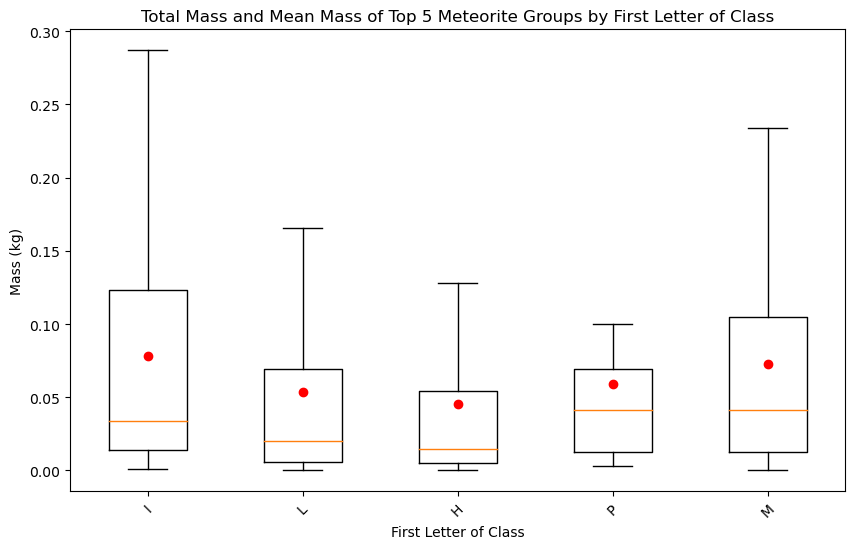

In [19]:
filtered_data = data[['recclass', 'mass (g)']]

# Group the filtered data by the first letter of the class and calculate the total mass of each group
total_masses = filtered_data.groupby(filtered_data['recclass'].str[0])['mass (g)'].sum()

# Sort the data in descending order by total mass and take the top 5 groups
top_groups = total_masses.sort_values(ascending=False).head(5)

# Filter the data to only include the top 5 groups
filtered_data = filtered_data[filtered_data['recclass'].str[0].isin(top_groups.index)]

# Convert mass from grams to kilograms
filtered_data['mass (kg)'] = filtered_data['mass (g)'] / 1000.0

# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(filtered_data['mass (kg)'], [25, 75])
iqr = q3 - q1

# Set the threshold for outliers
threshold = 1.5 * iqr

# Remove the outliers
filtered_data = filtered_data.loc[abs(filtered_data['mass (kg)'] - np.median(filtered_data['mass (kg)'])) <= threshold]

# Plot the box plots
plt.figure(figsize=(10,6))
plt.title('Total Mass and Mean Mass of Top 5 Meteorite Groups by First Letter of Class')
plt.xlabel('First Letter of Class')
plt.ylabel('Mass (kg)')
plt.xticks(rotation=45)
plt.boxplot([filtered_data[filtered_data['recclass'].str[0] == group]['mass (kg)'] for group in top_groups.index], showfliers=False)
plt.xticks(range(1, len(top_groups.index)+1), top_groups.index)
plt.plot(range(1, len(top_groups.index)+1), [np.mean(filtered_data[filtered_data['recclass'].str[0] == group]['mass (kg)']) for group in top_groups.index], 'ro')
plt.show()

Box plots of the top classes of meteorites found shows their distribution against their mass.We can conclude that, the mean masses for the top 5 classes is less than 0.1 kg, indicating very small pieces of meteorites were found in large numbers.

# Scatter Plot of Total classes of Meteorites found vs Latitude

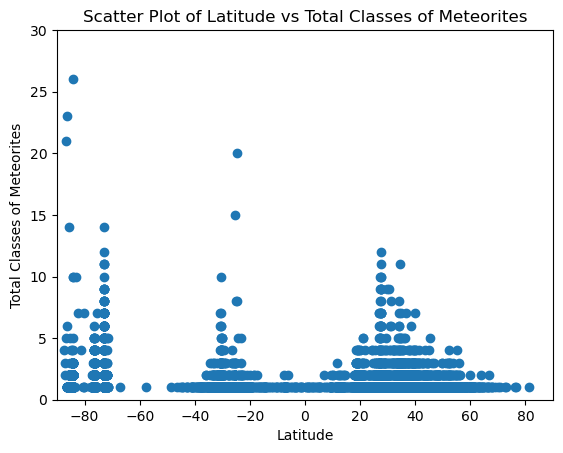

In [20]:
# Group the data by latitude and count the number of unique classes
lat_counts = data.groupby('reclat')['recclass'].nunique()

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(lat_counts.index, lat_counts.values)

# set x-axis and y-axis limits
plt.xlim(-90,90)
plt.ylim(0, 30)

# set axis labels
plt.xlabel('Latitude')
plt.ylabel('Total Classes of Meteorites')

# Set title
ax.set_title('Scatter Plot of Latitude vs Total Classes of Meteorites')

# Show the plot
plt.show()


As per above scatter plot highest no. of classes are observed near 30-degree latitude. Most meteorite falls occur between 30 degrees north and south latitude. This is likely because the Earth's magnetic field is weakest at the poles, making it more likely for meteorites to survive entry into the atmosphere.

# Heat Map of meteorites found on the globe

In [21]:

# Filter the dataset to include only landings between 1970 and 2015
meteorites = data[(data['year'] >= 1970) & (data['year'] <= 2015)]


# Create an interactive map of the meteorite landings
fig = px.scatter_geo(meteorites, lat='reclat', lon='reclong',
                     color='year', hover_name='name',
                     scope='world', projection='natural earth')

# Add a title and adjust marker size
fig.update_layout(title='Meteorite Landings on Earth (1970-2015)',
                  geo=dict(landcolor='white', coastlinecolor='grey'),
                  showlegend=True)
fig.update_traces(marker=dict(size=4))

# Divide the map into two parts above and below the equator
fig.add_shape(type='rect', x0=-180, y0=0, x1=180, y1=90, fillcolor='rgba(0,0,255,0.1)',
              line=dict(color='blue', width=2, dash='dot'))
fig.add_shape(type='rect', x0=-180, y0=-90, x1=180, y1=0, fillcolor='rgba(255,0,0,0.1)',
              line=dict(color='red', width=2, dash='dot'))

# Add equator line
eq_lat = [0] * 360
eq_lon = [i for i in range(-180, 0)] + [i for i in range(0, 181)]
fig.add_trace(go.Scattergeo(lat=eq_lat, lon=eq_lon, mode='lines',
                             line=dict(color='black', width=2), showlegend = False, legendgroup='equator', name='Equator'))



# Calculate the percentage of meteorites above, below, and on the equator
meteorites_above_equator = meteorites[meteorites['reclat'] > 0]
meteorites_below_equator = meteorites[meteorites['reclat'] < 0]
meteorites_on_equator = meteorites[meteorites['reclat'] == 0]
percent_above = meteorites_above_equator.shape[0] / meteorites.shape[0] * 100
percent_below = meteorites_below_equator.shape[0] / meteorites.shape[0] * 100
percent_on_equator = meteorites_on_equator.shape[0] / meteorites.shape[0] * 100

# Print the results
print(f'Percentage of meteorites above equator: {percent_above:.2f}%')
print(f'Percentage of meteorites below equator: {percent_below:.2f}%')
print(f'Percentage of meteorites on equator: {percent_on_equator:.2f}%')

# Show the map
fig.show()


Percentage of meteorites above equator: 15.48%
Percentage of meteorites below equator: 69.70%
Percentage of meteorites on equator: 14.82%


As per above heat map we can conclude that more meteors are found below the equator near the poles. Meteors found near equator are quite less because the Earth’s atmosphere is thicker and meteors enter at a shallow angle near the equator, so chances of meteors burning up or leaving the atmosphere are high.